In [2]:
import sunpy
import sunpy.map
import numpy as np
from math import *
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sunpy.coordinates import frames
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord
from matplotlib.patches import ConnectionPatch
import os,cv2
from scipy.optimize import fmin
from scipy.ndimage import affine_transform
import shutil
from scipy.io import readsav
import glob
from matplotlib.patches import Rectangle
from scipy.ndimage import zoom

c:\Users\19671\anaconda3\envs\sun\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
time_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA\AIA131rott\\'+'*.fits')
file_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\program\DEM\\'+'*.sav')
avg_temp=np.zeros(20)
avg_em=np.zeros(20)
all_smap_temp=[]
all_smap_em=[]
all_dem_out=[]
for i in range(20):
    datas=readsav(file_list[i])
    result=datas['result']
    dem_out=result['DEM_OUT'][0]
    smap_temp=result['SMAP_TEMP'][0]
    smap_em=result['SMAP_EM'][0]
    all_smap_temp.append(smap_temp)
    all_smap_em.append(smap_em)
    all_dem_out.append(dem_out)
    avg_temp[i]=np.mean(smap_temp[138:148,90:100])
    avg_em[i]=np.mean(smap_em[138:148,90:100])

In [8]:
temp1=all_smap_temp[0]
dem1=all_dem_out[0]

In [9]:
dem10=dem1[:,0,0]
print(dem10)

[8.80961195e+19 1.29428744e+20 1.49640560e+20 1.50539830e+20
 1.44894272e+20 1.46450669e+20 1.60486624e+20 1.53332472e+20
 9.58958045e+19 2.89779454e+19 3.03320750e+18 9.11247189e+16
 1.31198533e+15 1.76995609e+13 4.36334080e+11 3.92700004e+10
 2.24116281e+10 7.03047828e+10 9.28732702e+11 4.19292974e+13
 5.51609219e+15]


In [16]:
avg_t=0
for i in range(21):
    avg_t=avg_t+dem10[i]*10**(5.5+0.1*i)

avg_t=avg_t/np.sum(dem10)
print(10**(avg_t))

837011.1532514308


In [18]:
from scipy.io import readsav

# 读取 IDL 保存的 .sav 文件
data = readsav(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\131.sav', python_dict=True)

# 提取保存的结构
matrix_struct = data['matrix_struct']

# 遍历结构，提取每个矩阵
matrices = []
for i, entry in enumerate(matrix_struct):
    matrix = entry['matrix'].astype(float)  # 提取矩阵并转换为 NumPy 数组
    matrices.append(matrix)
    #print(f"Matrix {i}: Shape {matrix.shape}")

看一看AIA的尺寸，之前发现图像会有轻微的大小问题，发现是后面的尺寸稍微小一些。<font color=red size=7>目前先不进一步处理了，但是以后别忘了 </font>

In [19]:
data=readsav(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\131.sav')
data1=data['matrix_struct']
for i in range(100):
    print(data1[i][0].shape)

(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 385)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)
(384, 384)

这里是画图，看DEM的，或许比colobar固定住更正确一些

In [ ]:
time_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\131\\'+'*.fits')
file_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\DEM2\\'+'*.sav')
for i in range(101):
    datas=readsav(file_list[i])
    result=datas['result']
    dem_out=result['DEM_OUT'][0]
    smap_temp=result['SMAP_TEMP'][0]
    smap_em=result['SMAP_EM'][0]
    fig = plt.figure(figsize=(15, 5))
    gs=gridspec.GridSpec(5,15,wspace=0.5,hspace=0)
    ax1=fig.add_subplot(gs[0:5,1:5])
    plt.imshow(np.log1p(matrices[i]),cmap='sdoaia131',origin='lower',vmin=0.5,vmax=6)
    plt.axis('off')
    plt.title(time_list[i][-38:-21])
    ax2=fig.add_subplot(gs[0:5,5:10])
    plt.imshow(np.log10(smap_temp),cmap='jet',origin='lower')
    # left_bottom=(90,138)#x,y
    # rect=Rectangle(left_bottom,10,10,edgecolor='black',facecolor='none')#x,y
    # ax2.add_patch(rect)
    plt.title('Map of log temperature')
    plt.axis('off')
    plt.colorbar()
    ax3=fig.add_subplot(gs[0:5,10:15])
    plt.imshow(np.log10(smap_em),cmap='jet',origin='lower',vmin=26.5,vmax=29)
    # rect=Rectangle(left_bottom,10,10,edgecolor='black',facecolor='none')#x,y
    # ax3.add_patch(rect)
    plt.title('Map of log EM')
    plt.axis('off')
    plt.colorbar()
    plt.savefig(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\DEMfig\\'+str(i)+'.jpg',dpi=300)
    plt.close()


接下来我先看看曝光时间吧

In [3]:
file_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\193\\'+'*.fits')
for i in range(0,133):
    rsm=fits.open(file_list[i])
    exptime=rsm[1].header['EXPTIME']
    print(exptime)

2.000036
2.000036
2.000037
2.000039
2.000037
2.000038
2.000037
2.000036
2.0000389999999997
2.0000370000000003
2.0000359999999997
2.000037
2.000038
2.000036
2.00004
2.0000370000000003
2.000038
2.0000370000000003
2.00004
2.000038
2.000038
2.0000370000000003
2.000038
2.00004
2.0000370000000003
2.000038
2.000035
2.0000370000000003
2.000036
2.000038
2.000038
2.0000370000000003
2.000038
2.0000370000000003
2.0000370000000003
2.000038
2.000038
2.000035
2.000035
2.000034
2.000036
2.000035
2.0000389999999997
2.000036
2.000037
0.398498
2.000038
0.480419
2.000037
0.574625
2.000036
0.6893130000000001
2.000036
0.828576
2.0000389999999997
0.9924179999999999
2.00004
1.193153
2.00004
1.430714
2.000037
1.71332
2.000039
0.34115499999999993
2.000036
0.410786
2.000039
0.49270699999999995
2.000039
0.591009
2.000039
0.709797
2.000039
0.8531559999999998
2.000036
1.02109
2.000037
1.225918
2.000039
1.471659
2.000037
2.000039
2.0000389999999997
2.000036
2.0000370000000003
2.000036
2.000037
2.0000400000000003
2.0

从python序号第18的DEM开始间隔一个，画DEM的图像，固定和不固定colorbar都试一试

In [39]:
time_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\131\\'+'*.fits')
file_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\DEM2\\'+'*.sav')
for i in range(0,101,2):
    datas=readsav(file_list[i])
    result=datas['result']
    dem_out=result['DEM_OUT'][0]
    smap_temp=result['SMAP_TEMP'][0]
    smap_em=result['SMAP_EM'][0]
    fig = plt.figure(figsize=(15, 5))
    gs=gridspec.GridSpec(5,15,wspace=0.5,hspace=0)
    ax1=fig.add_subplot(gs[0:5,1:5])
    plt.imshow(np.log1p(matrices[i]),cmap='sdoaia131',origin='lower',vmin=0.5,vmax=6)
    plt.axis('off')
    plt.title(time_list[i][-38:-21])
    ax2=fig.add_subplot(gs[0:5,5:10])
    plt.imshow(np.log10(smap_temp),cmap='jet',origin='lower',vmin=6.0,vmax=7.3)
    # left_bottom=(90,138)#x,y
    # rect=Rectangle(left_bottom,10,10,edgecolor='black',facecolor='none')#x,y
    # ax2.add_patch(rect)
    plt.title('Map of log temperature')
    plt.axis('off')
    plt.colorbar()
    ax3=fig.add_subplot(gs[0:5,10:15])
    plt.imshow(np.log10(smap_em),cmap='jet',origin='lower',vmin=26.5,vmax=29)
    # rect=Rectangle(left_bottom,10,10,edgecolor='black',facecolor='none')#x,y
    # ax3.add_patch(rect)
    plt.title('Map of log EM')
    plt.axis('off')
    plt.colorbar()
    plt.savefig(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\DEM50\\'+str(i)+'.jpg',dpi=300)
    plt.close()


C:\Users\19671\AppData\Local\Temp\ipykernel_20336\1354324074.py:24: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(smap_em),cmap='jet',origin='lower',vmin=26.5,vmax=29)


输出的结果是DEM.mp4，看样子结果还是很不错的啊，那之后就按照从python序号32开始，间隔一个在DEM画slice，然后看喷流的速度吧  
我先再试试那个画slice的，把它改成python

In [47]:
time_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\131\\'+'*.fits')
file_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\DEM2\\'+'*.sav')
temp=np.zeros((384,384,34))
cnt=0
for i in range(32,99,2):
    datas=readsav(file_list[i])
    result=datas['result']
    dem_out=result['DEM_OUT'][0]
    smap_temp=result['SMAP_TEMP'][0]
    smap_em=result['SMAP_EM'][0]
    if smap_temp.shape[0]!=384 or smap_temp.shape[1]!=384:
        smap_temp=zoom(smap_temp,(384/smap_temp.shape[0],384/smap_temp.shape[1]),order=1)
    temp[:,:,cnt]=smap_temp
    cnt=cnt+1
np.save('temp.npy',temp)

In [40]:
print(np.linspace(0,1,5))

[0.   0.25 0.5  0.75 1.  ]


In [3]:
data=np.load(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\fit_points.npz')
slice=np.load(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\result_matrix.npy')
a=data['fit_points']
b=data['fit_points2']
c=data['fit_points3']

In [4]:
#算一下距离，这里算的是平均距离，以像素为单位,时间间隔是12s*2=24s
dist1=np.average(np.sqrt(np.diff(a[:,0])**2+np.diff(a[:,1])**2))
dist2=np.average(np.sqrt(np.diff(b[:,0])**2+np.diff(b[:,1])**2))
dist3=np.average(np.sqrt(np.diff(c[:,0])**2+np.diff(c[:,1])**2))
print(dist1,dist2,dist3)
avg_diff=np.average([dist1,dist2,dist3])
print(avg_diff)
#非常强，平均距离就是中间那条线的距离

5.149874071052627 4.8910559440820895 4.632244169727517
4.891058061620744


In [5]:
rsm=fits.open(r'D:\Learning\PHD1st\magnetic_reconnecion\data\AIA2\131\aia.lev1_euv_12s.2024-06-18T210044Z.131.image_lev1.fits')
dsun_obs=rsm[1].header['DSUN_OBS']
resolution=rsm[1].header['CDELT2']
#k是一角秒对应多少千米
k=sin(np.pi/(3600*180))*dsun_obs/1000
dist=k*resolution*avg_diff
print('离太阳的距离是',dsun_obs,'m')
print('一角秒对应多少千米是',k,'km/arc')
print('分辨率是',resolution,'arc/pixel')
print('尺寸是',dist,'km/pixel')

离太阳的距离是 151963569604.3406 m
一角秒对应多少千米是 736.7401757413695 km/arc
分辨率是 0.600697994 arc/pixel
尺寸是 2164.5785643123554 km/pixel


6.46pixel_y/pixel_x


In [6]:
#接下来算一下纵坐标和横坐标的值
#dist单位是km/pixel avg_dist单位是pixel,除1000变成兆米，乘78是一共多长
print(dist*1e-3*78)
trans_coeff=dist*1e-3
print(trans_coeff)
corr_y=np.zeros(6)
for i in range(len(corr_y)):
    corr_y[i]=25*(i+1)/trans_coeff
#32是第一个点，对应时间21：07：08
#98是第三十四个点，对应时间21：20：20
#算横轴时间的对应坐标
corr_x=np.zeros(4)
for i in range(len(corr_x)):
    corr_x[i]=(52+i*240)/24

168.83712801636375
2.1645785643123556


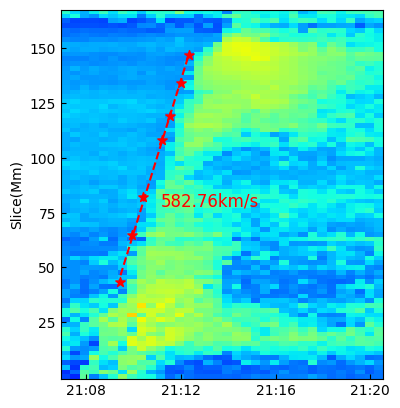

In [8]:
plt.imshow(np.log10(slice),cmap='jet',origin='lower',vmin=6.0,vmax=7.3,aspect=0.5)
coord=[(5.8,20),(7,30),(8.2,38),(10.2,50),(11,55),(12.2,62),(13,68)]
x1,y1=zip(*coord)
x1,y1=np.array(x1),np.array(y1)
plt.scatter(x=x1,y=y1,c='red',marker='*',s=50)
coeff1=np.polyfit(x1,y1,1)
poly1=np.poly1d(coeff1)
plt.text(10,36,'582.76km/s',fontsize=12,color='red')
plt.yticks(ticks=corr_y,labels=['25','50','75','100','125','150'])
plt.ylabel('Slice(Mm)')
plt.xticks(ticks=corr_x,labels=['21:08','21:12','21:16','21:20'])
plt.plot(x1,poly1(x1),c='red',linestyle='--')
plt.tick_params(axis='both',direction='in')